In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [28]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
X_train[0].shape

(28, 28)

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
y_train.shape

(60000,)

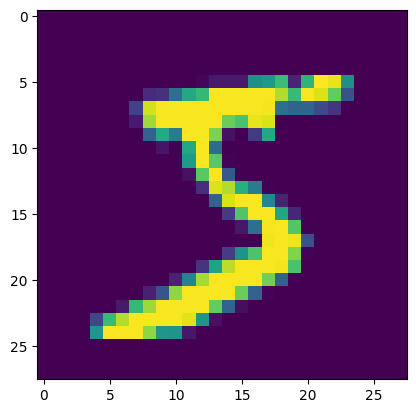

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [34]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## scaling the array

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [57]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,994 (414.04 KB)

 Trainable params: 105,994 (414.04 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam',
              metrics=['accuracy'])

In [61]:
history = model.fit(X_train,y_train,epochs = 20,validation_split=0.22)

Epoch 1/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9798 - loss: 0.0654 - val_accuracy: 0.9692 - val_loss: 0.1073
Epoch 2/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9841 - loss: 0.0483 - val_accuracy: 0.9702 - val_loss: 0.1046
Epoch 3/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9865 - loss: 0.0415 - val_accuracy: 0.9717 - val_loss: 0.1065
Epoch 4/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.9721 - val_loss: 0.1089
Epoch 5/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9721 - val_loss: 0.1079
Epoch 6/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9923 - loss: 0.0237 - val_accuracy: 0.9729 - val_loss: 0.1154
Epoch 7/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9726 - val_loss: 0.1227
Epoch 8/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9939 - loss: 0.017

In [62]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [63]:
y_prob.shape

(10000, 10)

In [64]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [65]:
from sklearn.metrics import accuracy_score

# y_prob is the predicted probabilities from model.predict
# Convert the probabilities to predicted class labels by taking the index of the maximum probability
y_pred_labels = y_prob.argmax(axis=1)

# Now calculate the accuracy score using the true labels (y_test) and the predicted labels (y_pred_labels)
accuracy_score(y_test, y_pred_labels)

0.9749

In [66]:
import numpy as np

# Simulated predicted probabilities for 3 samples (images) and 10 classes (digits 0-9)
y_prob = np.array([
    [0.1, 0.7, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # Sample 1
    [0.8, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # Sample 2
    [0.3, 0.4, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   # Sample 3
])

print("y_prob shape:", y_prob.shape)  # Output: (3, 10)

# Using axis=0: Calculate the mean probability for each class across all samples
mean_probabilities = y_prob.mean(axis=0)
print("Mean probabilities for each class (axis=0):", mean_probabilities)

# Using axis=1: Find the predicted class for each sample
predicted_classes = np.argmax(y_prob, axis=1)
print("Predicted classes for each sample (axis=1):", predicted_classes)


y_prob shape: (3, 10)
Mean probabilities for each class (axis=0): [0.4        0.4        0.16666667 0.         0.         0.
 0.         0.         0.         0.        ]
Predicted classes for each sample (axis=1): [1 0 1]



---

### ✅ In NumPy:

* `**axis=0**` → Operate **down rows**, i.e., **across rows**, so you're working **column-wise**
  ➤ Think: **columns are fixed, rows are reduced**

* `**axis=1**` → Operate **across columns**, i.e., **row-wise**
  ➤ Think: **rows are fixed, columns are reduced**

---

### 🔁 Visual Example

For a 2D array:

```python
A = np.array([
    [1, 2, 3],   # Row 0
    [4, 5, 6],   # Row 1
    [7, 8, 9]    # Row 2
])
```

#### `A.sum(axis=0)` → sum down the rows = column sums:

```python
# [1+4+7, 2+5+8, 3+6+9] = [12, 15, 18]
```

#### `A.sum(axis=1)` → sum across the columns = row sums:

```python
# [1+2+3, 4+5+6, 7+8+9] = [6, 15, 24]
```

---

### 🔁 Keyword Mnemonic:

* `axis=0` → "go **down** the 0th axis" (rows), reduce **rows**
* `axis=1` → "go **across** the 1st axis" (columns), reduce **columns**




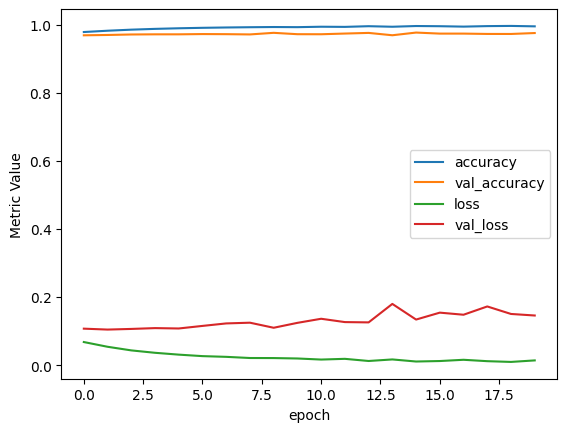

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
# Corrected function name to set the y-axis label
plt.ylabel('Metric Value') # Or a more descriptive label
plt.legend(['accuracy','val_accuracy','loss','val_loss'])

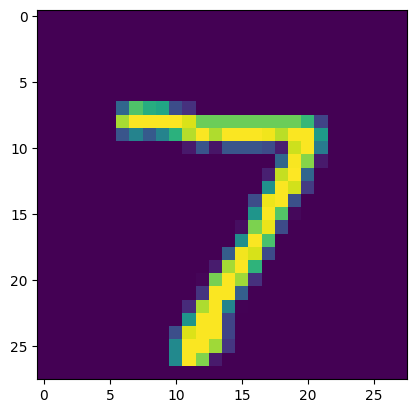

In [72]:
plt.imshow(X_test[0])

In [73]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis= 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([7])